# Análisis y Predicción de Ventas en una Tienda de Retail

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/sebac/OneDrive/Documentos/Cursos/0-DATASETS/retail_sales_dataset.csv")
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


## Transformación de Datos

### Crear nuevas columnas

In [200]:
# Se crea la columna de rango de edad
df['Rango_de_edad'] = df['Age'].transform(lambda x: 'Menor o igual a 30 años' if x >= 20 and x <= 30 else 'Mayor a 30 años')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Rango_de_edad
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Mayor a 30 años
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Menor o igual a 30 años
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mayor a 30 años
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Mayor a 30 años
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Menor o igual a 30 años
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,Mayor a 30 años
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,Mayor a 30 años
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,Menor o igual a 30 años
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,Mayor a 30 años


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
 9   Rango_de_edad     1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [202]:
# Se crea una columna de venta normalizada
max_venta = df['Total Amount'].max()
min_venta = df['Total Amount'].min()
df['Venta_normalizada'] = df['Total Amount'].transform(lambda x: (x - min_venta) / (max_venta - min_venta))
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Rango_de_edad,Venta_normalizada
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Mayor a 30 años,0.063291
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Menor o igual a 30 años,0.493671
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mayor a 30 años,0.002532
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Mayor a 30 años,0.240506
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Menor o igual a 30 años,0.037975
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,Mayor a 30 años,0.012658
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,Mayor a 30 años,0.032911
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,Menor o igual a 30 años,0.037975
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,Mayor a 30 años,0.063291


In [203]:
# Se tiene los datos estadisticos de la columna Total Amount
df['Total Amount'].describe()

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: Total Amount, dtype: float64

### Clasifica los datos

In [204]:
# Se agrega una clasificacion por tipo de venta segun su importe
ventas = df['Total Amount']

def clasificar(ventas):
    clasificacion = []
    for venta in ventas:
        if venta <= 60:
            clasificacion.append('Bajo')
        elif venta > 60 and venta < 900:
            clasificacion.append('Medio')
        else:
            clasificacion.append('Alto')
    return clasificacion

df['Clasificacion'] = clasificar(ventas)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Rango_de_edad,Venta_normalizada,Clasificacion
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Mayor a 30 años,0.063291,Medio
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Menor o igual a 30 años,0.493671,Alto
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mayor a 30 años,0.002532,Bajo
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Mayor a 30 años,0.240506,Medio
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Menor o igual a 30 años,0.037975,Medio


In [205]:
# Se cuenta la cantidad de registros para cada clasificicacion
df['Clasificacion'].value_counts()

Clasificacion
Medio    474
Alto     264
Bajo     262
Name: count, dtype: int64

## Agrupación y Agregación

### Agrupación por múltiples columnas

In [206]:
# Se agrupa el importe total vendido por genero y tipo de producto
suma_por_gender_y_producto = df.groupby(['Gender','Product Category'])['Total Amount'].sum()
suma_por_gender_y_producto

Gender  Product Category
Female  Beauty              74830
        Clothing            81275
        Electronics         76735
Male    Beauty              68685
        Clothing            74305
        Electronics         80170
Name: Total Amount, dtype: int64

Las mujeres compran mas ropa y los hombres articulos electronicos

In [207]:
# Se agrupa el importe medio por rango edad y clasificacion de importe vendido
df.groupby(['Rango_de_edad','Clasificacion'])['Total Amount'].mean()

Rango_de_edad            Clasificacion
Mayor a 30 años          Alto             1302.487562
                         Bajo               42.954545
                         Medio             213.067568
Menor o igual a 30 años  Alto             1282.539683
                         Bajo               42.968750
                         Medio             224.134615
Name: Total Amount, dtype: float64

En promedio los mayores a 30 años gastan más que los menores a 30 años

### Aplicar funciones de agregación

In [208]:
# Se ven los datos estadisticos con las funciones de agregación
df['Total Amount'].agg(['mean','sum','count','var','std'])

mean        456.000000
sum      456000.000000
count      1000.000000
var      313597.347347
std         559.997632
Name: Total Amount, dtype: float64

In [209]:
# Se ven los datos estadisticos por tipo de clasificacion ALTO
clasificacion_alto = df.loc[df['Clasificacion'] == 'Alto']
clasificacion_alto['Total Amount'].describe()

count     264.000000
mean     1297.727273
std       394.248751
min       900.000000
25%      1000.000000
50%      1200.000000
75%      1500.000000
max      2000.000000
Name: Total Amount, dtype: float64

In [210]:
# Se ven los datos estadisticos por tipo de clasificacion MEDIO
clasificacion_medio = df.loc[df['Clasificacion'] == 'Medio']
clasificacion_medio['Total Amount'].describe()

count    474.000000
mean     215.495781
std      167.057981
min       75.000000
25%      100.000000
50%      120.000000
75%      300.000000
max      600.000000
Name: Total Amount, dtype: float64

In [211]:
# Se ven los datos estadisticos por tipo de clasificacion BAJO
clasificacion_bajo = df.loc[df['Clasificacion'] == 'Bajo']
clasificacion_bajo['Total Amount'].describe()

count    262.000000
mean      42.958015
std       12.951803
min       25.000000
25%       30.000000
50%       50.000000
75%       50.000000
max       60.000000
Name: Total Amount, dtype: float64

## Análisis Personalizado con apply

### Función personalizada

In [212]:
# Convertir la Serie en un DataFrame (la serie es mi resultado de agrupacion con groupby)
# Se agrega una columna de % del total de cada agrupacion
df_suma = suma_por_gender_y_producto.reset_index()

df_suma['Porcentaje'] = df_suma['Total Amount'].transform(lambda x: x / (x.sum()) * 100 )
df_suma = df_suma.sort_values(by='Porcentaje', ascending=False)
df_suma

,Gender,Product Category,Total Amount,Porcentaje
1,Female,Clothing,81275,17.823465
5,Male,Electronics,80170,17.581140
2,Female,Electronics,76735,16.827851
0,Female,Beauty,74830,16.410088
4,Male,Clothing,74305,16.294956
3,Male,Beauty,68685,15.062500


In [213]:
# Se ve la media por cada grupo
mean_per_group = df.groupby('Clasificacion')['Total Amount'].mean()
mean_per_group

Clasificacion
Alto     1297.727273
Bajo       42.958015
Medio     215.495781
Name: Total Amount, dtype: float64

In [214]:
# Se agrega una columna de media segun el grupo al que le corresponde cada fila
df['Media por Grupo'] = df['Clasificacion'].map(mean_per_group)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Rango_de_edad,Venta_normalizada,Clasificacion,Media por Grupo
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Mayor a 30 años,0.063291,Medio,215.495781
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Menor o igual a 30 años,0.493671,Alto,1297.727273
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mayor a 30 años,0.002532,Bajo,42.958015
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Mayor a 30 años,0.240506,Medio,215.495781
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Menor o igual a 30 años,0.037975,Medio,215.495781
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,Mayor a 30 años,0.012658,Bajo,42.958015
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,Mayor a 30 años,0.032911,Medio,215.495781
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,Menor o igual a 30 años,0.037975,Medio,215.495781
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,Mayor a 30 años,0.063291,Medio,215.495781


In [215]:
# Se agrega una columna de desviacion, restando el importe total por la media
df['Desviacion'] = df['Total Amount'] - df['Media por Grupo']
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Rango_de_edad,Venta_normalizada,Clasificacion,Media por Grupo,Desviacion
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Mayor a 30 años,0.063291,Medio,215.495781,-65.495781
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Menor o igual a 30 años,0.493671,Alto,1297.727273,-297.727273
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mayor a 30 años,0.002532,Bajo,42.958015,-12.958015
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Mayor a 30 años,0.240506,Medio,215.495781,284.504219
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Menor o igual a 30 años,0.037975,Medio,215.495781,-115.495781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,Mayor a 30 años,0.012658,Bajo,42.958015,7.041985
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,Mayor a 30 años,0.032911,Medio,215.495781,-125.495781
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,Menor o igual a 30 años,0.037975,Medio,215.495781,-115.495781
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,Mayor a 30 años,0.063291,Medio,215.495781,-65.495781


In [216]:
# 2da manera de calcular la desviacion sobre la media de cada grupo
# Se crea una funcion que realice el calculo y luego se agrega la columna
def calculo_desviacion(row):
    mean_value = mean_per_group[row['Clasificacion']]
    return row['Total Amount'] - mean_value

df['Desviacion2'] = df.apply(calculo_desviacion, axis=1)
df


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Rango_de_edad,Venta_normalizada,Clasificacion,Media por Grupo,Desviacion,Desviacion2
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Mayor a 30 años,0.063291,Medio,215.495781,-65.495781,-65.495781
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Menor o igual a 30 años,0.493671,Alto,1297.727273,-297.727273,-297.727273
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mayor a 30 años,0.002532,Bajo,42.958015,-12.958015,-12.958015
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Mayor a 30 años,0.240506,Medio,215.495781,284.504219,284.504219
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Menor o igual a 30 años,0.037975,Medio,215.495781,-115.495781,-115.495781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,Mayor a 30 años,0.012658,Bajo,42.958015,7.041985,7.041985
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,Mayor a 30 años,0.032911,Medio,215.495781,-125.495781,-125.495781
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,Menor o igual a 30 años,0.037975,Medio,215.495781,-115.495781,-115.495781
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,Mayor a 30 años,0.063291,Medio,215.495781,-65.495781,-65.495781


## GRAFICOS

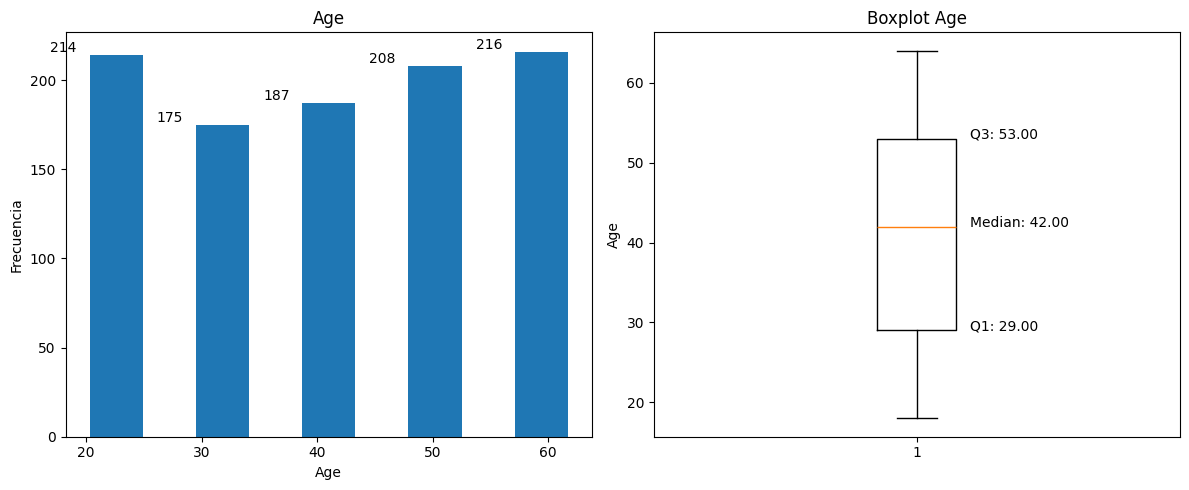

In [217]:
# Crear subgráficas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Histograma
datos = df['Age']  # Se cargan los datos
n, bins, patches = axs[0].hist(datos, bins=5, rwidth=0.5)  # Histograma
axs[0].set_xlabel("Age")  # Etiqueta del eje X
axs[0].set_ylabel("Frecuencia")  # Etiqueta del eje Y
axs[0].set_title("Age")  # Título del gráfico

# Etiquetas en el histograma
for count, x in zip(n, bins):
    axs[0].text(x + 0.05, count, str(int(count)), ha='center', va='bottom')

# Boxplot
axs[1].boxplot(datos)  # Boxplot
axs[1].set_ylabel("Age")  # Etiqueta del eje Y
axs[1].set_title("Boxplot Age")  # Título del gráfico

# Calcular los cuartiles
Q1 = datos.quantile(0.25)  # Primer cuartil
Q2 = datos.median()  # Mediana (segundo cuartil)
Q3 = datos.quantile(0.75)  # Tercer cuartil

# Etiquetas de datos para los cuartiles
axs[1].text(1.1, Q1, f'Q1: {Q1:.2f}', fontsize=10, ha='left')
axs[1].text(1.1, Q2, f'Median: {Q2:.2f}', fontsize=10, ha='left')
axs[1].text(1.1, Q3, f'Q3: {Q3:.2f}', fontsize=10, ha='left')

# Ajustar el espacio entre gráficos
plt.tight_layout()

# Mostrar gráfico
plt.show()

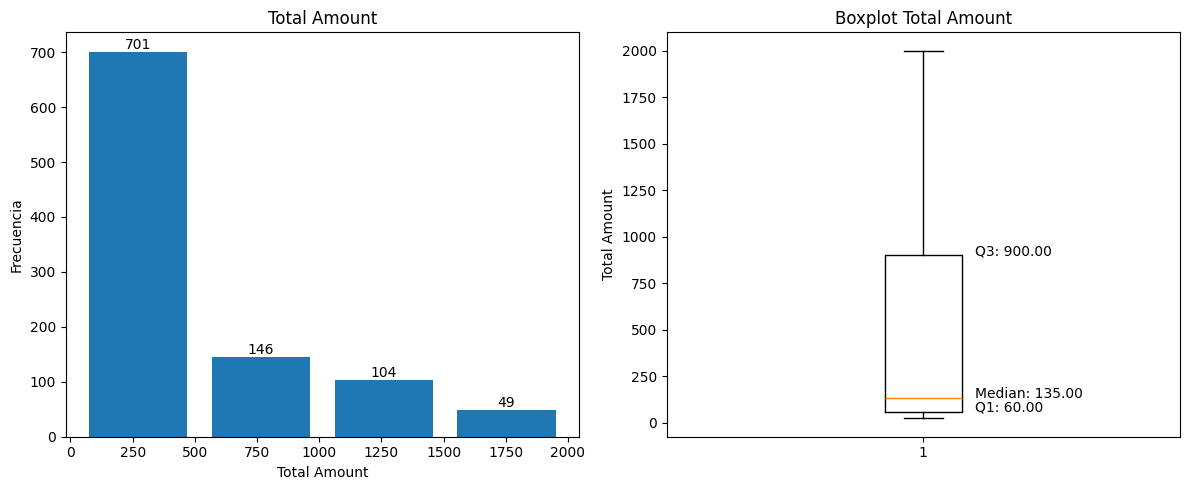

In [218]:
# Crear subgráficas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Histograma
datos = df['Total Amount']  # Se cargan los datos
n, bins, patches = axs[0].hist(datos, bins=4, rwidth=0.8)  # Histograma
axs[0].set_xlabel("Total Amount")  # Etiqueta del eje X
axs[0].set_ylabel("Frecuencia")  # Etiqueta del eje Y
axs[0].set_title("Total Amount")  # Título del gráfico

# Etiquetas en el histograma
for count, left, right in zip(n, bins[:-1], bins[1:]):  # bins[:-1] y bins[1:] recorren cada par de bordes
    x = (left + right) / 2  # Centro de la barra
    axs[0].text(x, count, str(int(count)), ha='center', va='bottom')  # Etiqueta en el centro de la barra


# Boxplot
axs[1].boxplot(datos)  # Boxplot
axs[1].set_ylabel("Total Amount")  # Etiqueta del eje Y
axs[1].set_title("Boxplot Total Amount")  # Título del gráfico

# Calcular los cuartiles
Q1 = datos.quantile(0.25)  # Primer cuartil
Q2 = datos.median()  # Mediana (segundo cuartil)
Q3 = datos.quantile(0.75)  # Tercer cuartil

# Etiquetas de datos para los cuartiles
axs[1].text(1.1, Q1, f'Q1: {Q1:.2f}', fontsize=10, ha='left')
axs[1].text(1.1, Q2, f'Median: {Q2:.2f}', fontsize=10, ha='left')
axs[1].text(1.1, Q3, f'Q3: {Q3:.2f}', fontsize=10, ha='left')

# Ajustar el espacio entre gráficos
plt.tight_layout()

# Mostrar gráfico
plt.show()

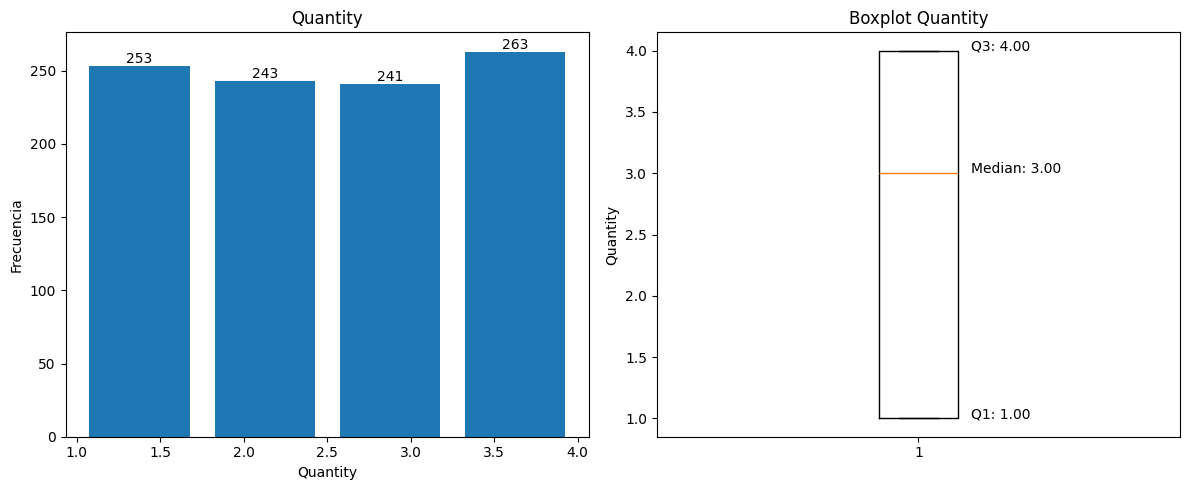

In [219]:
# Crear subgráficas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Histograma
datos = df['Quantity']  # Se cargan los datos
n, bins, patches = axs[0].hist(datos, bins=4, rwidth=0.8)  # Histograma
axs[0].set_xlabel("Quantity")  # Etiqueta del eje X
axs[0].set_ylabel("Frecuencia")  # Etiqueta del eje Y
axs[0].set_title("Quantity")  # Título del gráfico

# Etiquetas en el histograma
for count, left, right in zip(n, bins[:-1], bins[1:]):  # bins[:-1] y bins[1:] recorren cada par de bordes
    x = (left + right) / 2  # Centro de la barra
    axs[0].text(x, count, str(int(count)), ha='center', va='bottom')  # Etiqueta en el centro de la barra


# Boxplot
axs[1].boxplot(datos)  # Boxplot
axs[1].set_ylabel("Quantity")  # Etiqueta del eje Y
axs[1].set_title("Boxplot Quantity")  # Título del gráfico

# Calcular los cuartiles
Q1 = datos.quantile(0.25)  # Primer cuartil
Q2 = datos.median()  # Mediana (segundo cuartil)
Q3 = datos.quantile(0.75)  # Tercer cuartil

# Etiquetas de datos para los cuartiles
axs[1].text(1.1, Q1, f'Q1: {Q1:.2f}', fontsize=10, ha='left')
axs[1].text(1.1, Q2, f'Median: {Q2:.2f}', fontsize=10, ha='left')
axs[1].text(1.1, Q3, f'Q3: {Q3:.2f}', fontsize=10, ha='left')

# Ajustar el espacio entre gráficos
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [220]:
# Convierte la columna a datetime y luego extrae solo el año y el mes
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.to_period('M')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Rango_de_edad,Venta_normalizada,Clasificacion,Media por Grupo,Desviacion,Desviacion2
0,1,2023-11,CUST001,Male,34,Beauty,3,50,150,Mayor a 30 años,0.063291,Medio,215.495781,-65.495781,-65.495781
1,2,2023-02,CUST002,Female,26,Clothing,2,500,1000,Menor o igual a 30 años,0.493671,Alto,1297.727273,-297.727273,-297.727273
2,3,2023-01,CUST003,Male,50,Electronics,1,30,30,Mayor a 30 años,0.002532,Bajo,42.958015,-12.958015,-12.958015
3,4,2023-05,CUST004,Male,37,Clothing,1,500,500,Mayor a 30 años,0.240506,Medio,215.495781,284.504219,284.504219
4,5,2023-05,CUST005,Male,30,Beauty,2,50,100,Menor o igual a 30 años,0.037975,Medio,215.495781,-115.495781,-115.495781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05,CUST996,Male,62,Clothing,1,50,50,Mayor a 30 años,0.012658,Bajo,42.958015,7.041985,7.041985
996,997,2023-11,CUST997,Male,52,Beauty,3,30,90,Mayor a 30 años,0.032911,Medio,215.495781,-125.495781,-125.495781
997,998,2023-10,CUST998,Female,23,Beauty,4,25,100,Menor o igual a 30 años,0.037975,Medio,215.495781,-115.495781,-115.495781
998,999,2023-12,CUST999,Female,36,Electronics,3,50,150,Mayor a 30 años,0.063291,Medio,215.495781,-65.495781,-65.495781


In [221]:
# Se preparan los datos para generar un grafico de lineas
ventas_por_periodo = df.groupby('Date')['Total Amount'].sum()
periodo = ventas_por_periodo.index
venta_total = ventas_por_periodo.values
print(periodo)
print(venta_total)

PeriodIndex(['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
             '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
             '2024-01'],
            dtype='period[M]', name='Date')
[35450 44060 28990 33870 53150 36715 35465 36960 23620 46580 34920 44690
  1530]


In [227]:
# Convierte el PeriodIndex en formato datetime
periodo = periodo.to_timestamp()
periodo

(array([19358., 19417., 19478., 19539., 19601., 19662., 19723.]),
 [Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

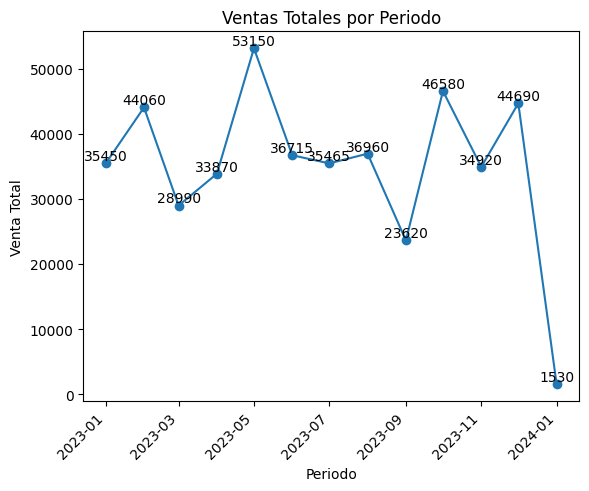

In [230]:
# Acá se genera el gráfico utilizando plot, con los datos obtenidos en el fragmento de codigo anterior
# Crear el gráfico de línea
plt.plot(periodo, venta_total, marker='o')  # marker='o' añade puntos en cada dato

# Etiquetas de datos
for x, y in zip(periodo, venta_total):
    plt.text(x, y, str(y), fontsize=10, ha='center', va='bottom')  # Ajusta fontsize para el tamaño de las etiquetas

# Etiquetas de los ejes y título
plt.ylabel("Venta Total")
plt.xlabel("Periodo")
plt.title("Ventas Totales por Periodo")

# Rotar y ajustar etiquetas en el eje X
plt.xticks(rotation=45, ha='right')  # Rotación de 45 grados y alineación a la derecha

Se ve que el pico de ventas fue en mayo de 2023 y una caida importante en enero 2024 pero se debe a que aun no se tiene los datos de el mes completo

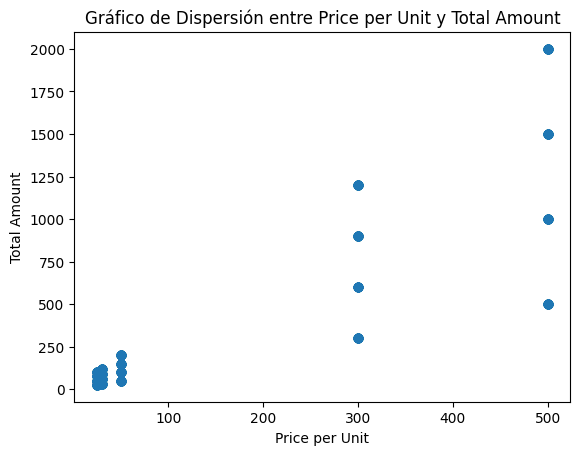

In [245]:
# Crear el gráfico de dispersión
plt.scatter(df['Price per Unit'], df['Total Amount'], alpha=0.6)  # alpha ajusta la transparencia de los puntos

# Etiquetas y título
plt.xlabel("Price per Unit")
plt.ylabel("Total Amount")
plt.title("Gráfico de Dispersión entre Price per Unit y Total Amount")

# Mostrar gráfico
plt.show()

In [243]:
# Se calcula la correlación para confirmar
correlation = df['Price per Unit'].corr(df['Total Amount'])
print("Correlación:", correlation)

Correlación: 0.8519248403554038


Se ve una correlación positva, a medida que el precio sube, también el total de venta. Acá se aprecia que la mayoría igual se encuentran con precios debajo de los 100 y ventas debajo del total de 250